In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw02.ipynb")

# Homework 2: Pandas and Data Visualization
# Due Monday 1/29 at 11:59pm

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import legend
from IPython.display import display, Latex, Markdown
from pandas.plotting import register_matplotlib_converters
import autograder_tools as at
register_matplotlib_converters()

%matplotlib inline

## Point Breakdown (93 pts total)
- Q0a: 2 pts
- Q0b: 1 pt
- Q1a: 2 pts
- Q1b: 15 pts
- Q1c: 15 pts
- Q1d: 6 pts
- Q1e: 12 pts
- Q1f: 15 pts
- Q1g: 4 pts
- Q1h: 15 pts
- Q1i: 6 pts

## Homework Partners 
Please contact your homework partner and help them answer any questions they have about the homework. Also, please answer the questions below about your partner.


```
['Kyle', 'Tyler'],
['Alex', 'Maximilian'],
['Andy', 'Olivia'],
['Lexie', 'Colin'],
['Morgan', 'Alaina'],
['Riley', 'Kili'],
['Emmanuela', 'Brenly'],
['Hadrian', 'Alexis'],
['Chandra', 'Karly'],
['Sarah', 'Blake'],
['Rachel', 'Lindsey'],
['Jesse', 'Kaya'],
['Samuel', 'Marina'],
['James', 'Madelyn'],
['Shreetama', 'Imre'],
['Finn', 'Lucas'],
['Aine', 'Andrea V.'],
['Siena', 'Andrea S.']

```

**Partner Questions:**

- Favorite character from a novel?
- Favorite character from a movie?

_Type your answer here, replacing this text._

## Question 0: Warm Up - Creating a Pandas DataFrame 

We want to create a Pandas DataFrame from the following information:

- The common name for *Yucca filamentosa* is Yucca, and it is not native to Oregon. Two plants that are native to Oregon are *Neottia cordata*, known as Heart-leaved twayblade, and *Festuca idahoensis*, known as Idaho fescue.
  
### Question 0a (2 pts):
First make a dictionary from this information with three keys: `'latin_name'`, `'common_name'`, and `'oregon_native'`. 

The key `'oregon_native'` should have values `'yes'` or `'no'`.

**Hint**: For grading purposes, copy/paste the names into your dictionary; for the latin names, do not copy the asterisks. 

#### Answer 0a

In [3]:
flora_dict = {
    'latin_name': ['Yucca filamentosa', 'Neottia cordata', 'Festuca idahoensis'],
    'common_name': ['Yucca', 'Heart-leaved twayblade', 'Idaho fescue'],
    'oregon_native': ['no', 'yes', 'yes']}
flora_dict

{'latin_name': ['Yucca filamentosa', 'Neottia cordata', 'Festuca idahoensis'],
 'common_name': ['Yucca', 'Heart-leaved twayblade', 'Idaho fescue'],
 'oregon_native': ['no', 'yes', 'yes']}

In [4]:
grader.check("q0a")

q0a results: All test cases passed!

### Question 0b (1 pt):

Now convert `flora_dict` into a 3x3 Pandas DataFrame:

#### Answer 0b

In [5]:
flora_df = pd.DataFrame.from_dict(flora_dict)
flora_df

,latin_name,common_name,oregon_native
0,Yucca filamentosa,Yucca,no
1,Neottia cordata,Heart-leaved twayblade,yes
2,Festuca idahoensis,Idaho fescue,yes


In [6]:
grader.check("q0b")

q0b results: All test cases passed!

---
## Question 1: 

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. We will be analyzing bike sharing data from Washington D.C. in 2011 and 2012.

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. 

After completing this assignment, you should be comfortable with:

* Wrangling data for analysis
* Using exploratory data analysis to investigate the data
* Making informative visualizations and controlling plot parameters
* Grouping data with `groupby` and `agg`


### Question 1a (2pts)
#### Loading Bike Sharing Data

Read the csv file `bikeshare.txt` into your notebook as a Pandas dataframe.

The resulting dataframe will have a series of variable names (columns).<br>
<br>
Here is a description of each variable in original txt file.

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
datetime | date (string)
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual bike users
registered | count of registered bike users
cnt | count of total rental bikes including casual and registered  


#### Answer 1a

In [7]:
# Load data into a Pandas Data Frame...
bikeshare = pd.read_csv('bikeshare.txt')

In [8]:
grader.check("q1a")

q1a results: All test cases passed!

#### Take a look at the dataframe you have read in

In [9]:
bikeshare.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### The `replace` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) of Pandas dataframes allows us to use a dictionary to replace existing values with alternatives. 
Because of the class cancellations, we didn't have time to cover this in class, so we provide helper code below that you should run and inspect. The first cell creates a replacement dictionary, `replace_df`, which we use to convert numerical data to strings, which are more readable. The second cell below uses the `.replace()` method to convert `weekday` numbers to three-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`). And for `holiday` and `workingday`, we convert `0/1` to `yes/no`. Compare the output of `bikeshare.head()` after this replacement.

In [10]:
# Use the following command to load in a csv file and create a replacement dictionary .
replace_df = pd.read_csv("replace_bikeshare.csv", index_col=0)
print(replace_df)


  holiday workingday weekday              weathersit
0      no         no     Sun                     NaN
1     yes        yes     Mon  clear or partly cloudy
2     NaN        NaN     Tue         mist and clouds
3     NaN        NaN     Wed      light snow or rain
4     NaN        NaN     Thu      heavy rain or snow
5     NaN        NaN     Fri                     NaN
6     NaN        NaN     Sat                     NaN


In [11]:
# Using the .replace() command we can perform these changes to the original bikeshare database
bikeshare = bikeshare.replace(replace_df)
bikeshare.head()

,instant,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,clear or partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,clear or partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,clear or partly cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,clear or partly cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,clear or partly cloudy,0.24,0.2879,0.75,0.0,0,1,1


### Question 1b (15 pts)
#### Converting hourly rider data to daily counts 
The original dataset has entries at the hourly level. However, for initial analysis, daily statistics will be most useful. Explore the factors that contribute to daily ridership among casual and registered users.

Construct a DataFrame named `daily_counts` grouped by `datetime` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)
* `mean_temp` : average temperature across all hourly readings from the day
* `max_temp` : maximum temperature from the day
* `min_temp` : minimum temperature from the day

Finally, `datetime` should end up as its own column, not as the index - use `reset_index` for making dates a column, not an index.

**Hint**: Use `groupby` and `agg`. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.

#### Answer 1b
**Before starting this question, ensure that you have run the previous cells to ensure you are working with the corrected `bikeshare` dataframe.**

In [15]:
# Use groupby() and agg() to create the dataframe `daily_counts`
# NOTE: Please name the dataFrame name `daily_counts` for autograding purposes
daily_counts=bikeshare.groupby('datetime').agg(casual=('casual','sum'), registered=('registered','sum'), workingday=('workingday','first'), meantemp=('temp','mean'), maxtemp=('temp','max'), mintemp=('temp','min'))


# Reset the index of your daily_counts dataframe 
daily_counts = daily_counts.reset_index()

In [16]:
daily_counts.head()

,datetime,casual,registered,workingday,meantemp,maxtemp,mintemp
0,2011-01-01,331,654,no,0.344167,0.46,0.20
1,2011-01-02,131,670,no,0.363478,0.46,0.22
2,2011-01-03,120,1229,yes,0.196364,0.26,0.14
3,2011-01-04,108,1454,yes,0.200000,0.30,0.12
4,2011-01-05,82,1518,yes,0.226957,0.30,0.16


In [17]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c (15pts)
#### Exploratory plotting of casual and registered ridership over time

Make a scatter plot of daily casual and registered ridership over time that adheres to the following specifications:
   - 'Date' is the horizontal axis. You can use the `datetime` column directly for these values. Some code is included to help clean up the label formatting.
   - 'Number of Daily Riders' is on the vertical axis.
   - Registered riders are plotted with cyan open markers (i.e. `facecolors='none'`); casual riders are plotted with red open markers.
   - Include a legend, title, and axis labels.
    
Please make two calls to the `scatter()` function, assigning the respective outputs to `registered_riders` and `casual_riders`.

Your plot should look something like this:<br>
<img src="casual_registered_riders.png" width="800" height="400">


### Answer 1c

Ellipsis

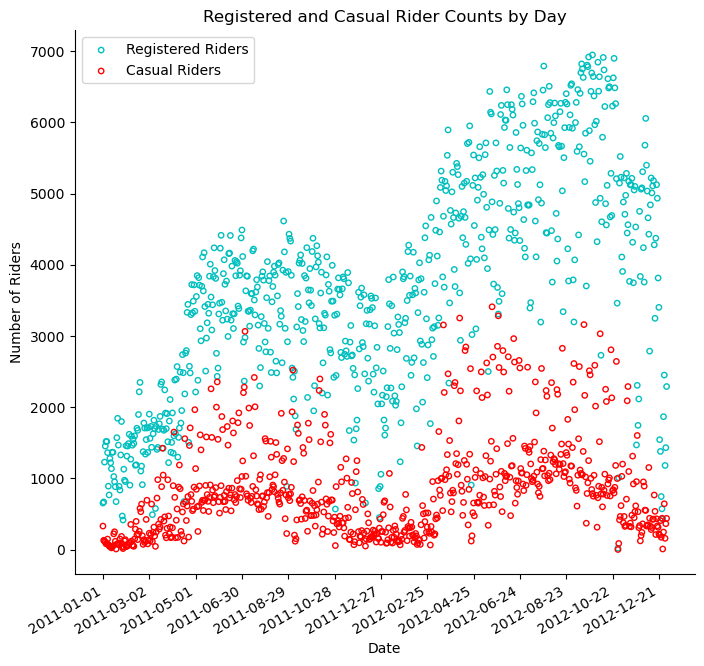

In [50]:
# This code creates your figure and axis
fig = plt.figure()
fig.set_size_inches(8, 8)
ax1d = fig.add_subplot(111)
# Add your plotting elements to ax1d, i.e. ax1d.scatter(...)

# Scatter the registered and casual rider counts for each date
# NOTE: Please assign output of your `.scatter()` function call to variables below for autograding purposes
registered_riders = ax1d.scatter(daily_counts['datetime'], daily_counts['registered'], color='c', s=15, facecolors='none', label='Registered Riders')
casual_riders = ax1d.scatter(daily_counts['datetime'], daily_counts['casual'], color='r', s=15, facecolors='none', label='Casual Riders')

ax1d.set_xlabel('Date')
ax1d.set_ylabel('Number of Riders')
ax1d.legend()
ax1d.spines[['top','right']].set_visible(False)
ax1d.set_title('Registered and Casual Rider Counts by Day')


# Leave this code in - it formats your x-tick labels
plt.xticks(np.arange(0,len(daily_counts), 60), rotation = 45)
fig.autofmt_xdate()

...


In [51]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d (6pts)
- What does the above scatter plot suggest about possible seasonal trends in casual and registered ridership? 
- Apart from seasonal trends, what other sources of variability might contribute to daily differences in casual and registered ridership? 
- What does the plot tell us about the relative numbers of casual and registered riders?

### Answer 1d


The above scatter plot suggests that, in general, ridership goes up during the summer. However, caual ridership seems to directly correlate with the season, while registered ridership does not fluxuate as much, even though there is still a trend of more riders during warmer months. Other variability that might contribute to the daily differences in casual and registered ridership include the weather, the day of the week, or holidays.

<!-- END QUESTION -->

### Question 1e (12 pts)
Make a scatter plot where days are individual points. For the scatter plot, the horizontal axis should be the number of casual riders and the vertical axis value the number of registered riders. There should be one marker for each day. Set the aspect ratio of the plot to 1 so that the horizontal and vertical axes have the same scale. Add a line with slope of 1 and zero y-intercept,  which corresponds to dates when casual and registered ridership are equal. Use the same marker style for scatter plots as before, with no face color.

Include labels and a title as usual. 

**Hint**: The `ax` method for setting aspect is `set_aspect(...)`.</br> 
Your plot should look something like this: </br>
<img src="Casual vs Registered Ridership Compared.png" width="800" height="400">

### Answer 1e

(0.0, 7000.0)

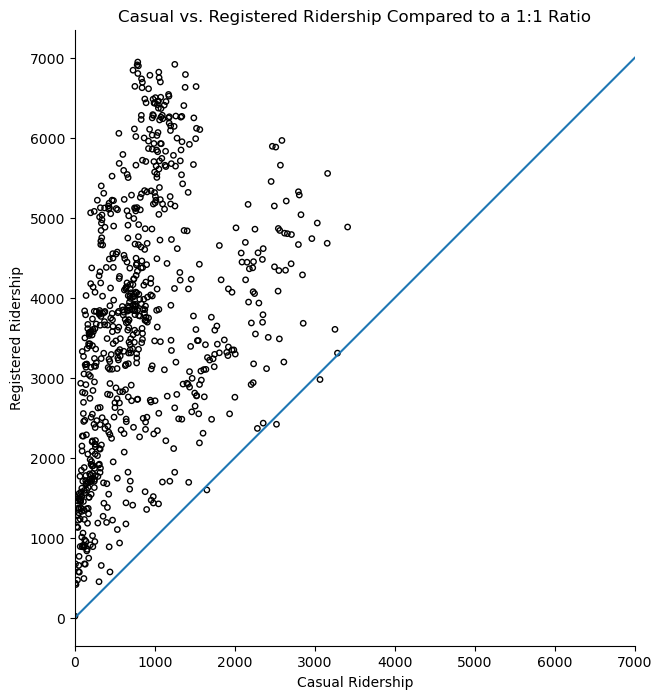

In [75]:
# This creates a new figure and sets its size
fig = plt.figure()
fig.set_size_inches(8, 8)
ax1f = fig.add_subplot(111)

# Add your plotting elements to ax1f, i.e. ax1f.plot(...)
# Make a scatter plot of the number of casual riders vs. the number of registered riders
# NOTE: Set the output of the .scatter() function equal to the variable cvr
cvr = ax1f.scatter(daily_counts['casual'], daily_counts['registered'], color='k', s=15, facecolors='none')

x=[1, 7000]
y=[1, 7000]
ax1f.plot(x, y)
ax1f.set_aspect(1)

ax1f.set_xlabel('Casual Ridership')
ax1f.set_ylabel('Registered Ridership')
ax1f.set_title('Casual vs. Registered Ridership Compared to a 1:1 Ratio')
ax1f.spines[['top','right']].set_visible(False)
ax1f.set_xlim([0, 7000])

In [59]:
grader.check("q1e")

q1e results: All test cases passed!

### Extra Question (0 pts)
Are there certain days with more casual ridership than registered? <br>
You can read this off the graph rather than perform analysis. How many days are there?

Yes, there are a few days that there was more casual ridership than registered ridership.
There are 3 days that this occurs.

### Question 1f (15 pts)
Modify the above scatter plot so that the points plotted are divided into two colors. One color should denote working days (values of `workingday` with value `'yes'`) and another color denotes non-working days (weekends and holidays; values of `workingday` with value `'no'`). </br>
Your plot should look something like this: </br>
<img src="Casual vs Registered 2.png" width="800" height="400">

### Answer 1f

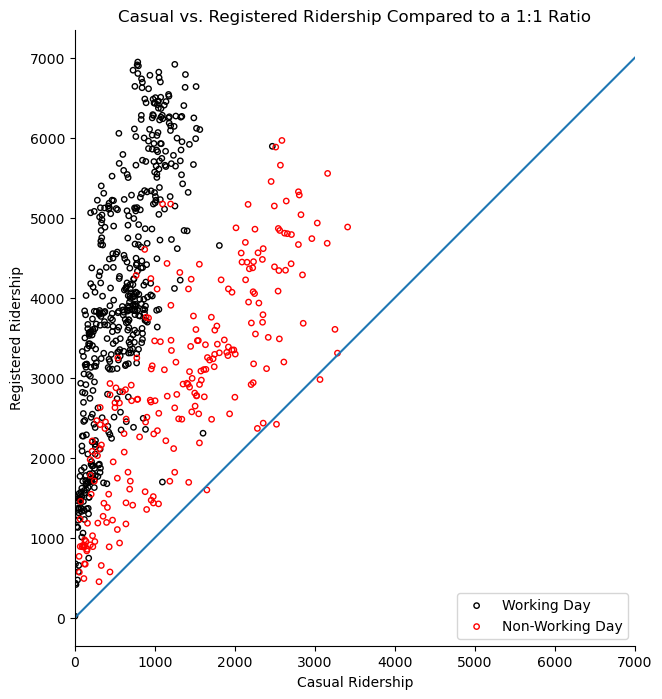

In [78]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax1g = fig.add_subplot(111)

...

# Make scatter plots on the provided axes. NOTE: Just as before, set the output of `.scatter()` to the provided variables.
weekday_df=daily_counts[daily_counts['workingday']=='yes']
weekend_df=daily_counts[daily_counts['workingday']=='no']

weekday = ax1g.scatter(weekday_df['casual'], weekday_df['registered'], color='k', s=15, facecolors='none', label='Working Day')
nonweekday = ax1g.scatter(weekend_df['casual'], weekend_df['registered'], color='r', s=15, facecolors='none', label='Non-Working Day')
ax1g.set_aspect(1)


# Plotting your line of slope 1 (same as previous question)
x=[1, 7000]
y=[1, 7000]
ax1g.plot(x, y)


# Add necessary graph legibility (may require a small addition to code from previous question)
ax1g.set_xlabel('Casual Ridership')
ax1g.set_ylabel('Registered Ridership')
ax1g.set_title('Casual vs. Registered Ridership Compared to a 1:1 Ratio')
ax1g.spines[['top','right']].set_visible(False)
ax1g.set_xlim([0, 7000])
ax1g.legend()

In [79]:
grader.check("q1f")

q1f results: All test cases passed!

### Question 1g (4 pts)
On days with higher number of casual riders, do there also seem to be higher amounts of registered riders?<br>
Does the value of `working day` seem to explain the ratio between casual and registered riders for that day? Explain.  <br>


### Answer 1g: 

In general, days with a higher number of casual riders also have a higher number of registered riders. The value of working day explains the ratio between casual and registered riders for that day because on working days, the ratio of registered riders to casual riders is very high. On non-working days, the ratio becomes closer to 1:1, however there is still a higher number of registered riders than causal riders in general.

<!-- END QUESTION -->

### Question 1h (15 pts)
#### Testing the influence of temperature on casual and registered ridership
Make a scatter plot that shows the relationship between daily mean temperature and casual ridership on working days and nonworking days. Plot individual days as scatter points, with `daily mean temperature` represented on the horizontal axis and `casual ridership` on the vertical axis. Make `working` and `nonworking` days separate colors to differentiate them.</br>
Your plot should look something like this: </br>
<img src="Casual Rider vs Mean Temp.png" width="800" height="400">

### Answer 1h

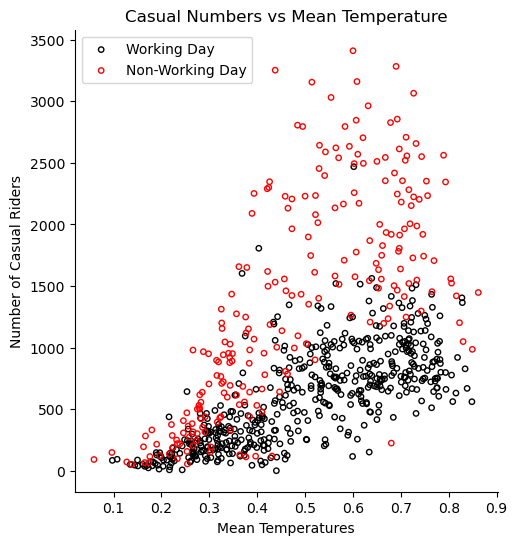

In [84]:
# Setting up figure
fig = plt.figure()
fig.set_size_inches(12,6)
ax1i = fig.add_subplot(121)

...

...

# Scatter the number of casual riders vs. the mean temperature on working days
working_day_scatter = ax1i.scatter(weekday_df['meantemp'], weekday_df['casual'], color='k', s=15, facecolors='none', label='Working Day')

# Scatter the number of casual riders vs. the mean temperature on non-working days
nonworking_day_scatter = ax1i.scatter(weekend_df['meantemp'], weekend_df['casual'], color='r', s=15, facecolors='none', label='Non-Working Day')

# Add necessary graph legibility (may require a small addition to code from previous question)
ax1i.set_xlabel('Mean Temperatures')
ax1i.set_ylabel('Number of Casual Riders')
ax1i.set_title('Casual Numbers vs Mean Temperature')
ax1i.spines[['top','right']].set_visible(False)
ax1i.legend()


In [85]:
grader.check("q1h")

q1h results: All test cases passed!

### Question 1i (6 pts)

Please answer each of the following questions in the space allowed below:
1. Does casual ridership tend to be higher on working or non-working days?
2. Broadly speaking, regardless of whether it is a working day, does the amount of casual ridership seem dependent on mean-temperature? How so?
3. Is the difference in casual ridership between working and non-working days higher on warmer or colder days?

### Answer 1i

1. Casual ridership tends to be higher on non-working days.
2. When the temperature is higher, casual ridership is higher. So I would say yes, it is dependent.
3. The difference between casual ridership between working and non-working days is higher on warmer days.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)